<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/J_Data_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
versioninfo()

Julia Version 1.10.8
Commit 4c16ff44be8 (2025-01-22 10:06 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


# Data Visualization

In [2]:


import Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("Plots")

using CSV
using DataFrames
using Statistics
using Plots

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [10745b16] + Statistics v1.10.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [3]:
import Pkg
Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [4]:
;wget https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/autoinsurance.csv

--2025-03-14 17:22:22--  https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/autoinsurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4669 (4.6K) [text/plain]
Saving to: ‘autoinsurance.csv’

     0K ....                                                  100% 32.6M=0s

2025-03-14 17:22:22 (32.6 MB/s) - ‘autoinsurance.csv’ saved [4669/4669]



In [5]:
;wget https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/life_insurance.csv

--2025-03-14 17:22:23--  https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/life_insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173 [text/plain]
Saving to: ‘life_insurance.csv’

     0K                                                       100% 2.60M=0s

2025-03-14 17:22:24 (2.60 MB/s) - ‘life_insurance.csv’ saved [173/173]



In [6]:
#read csv: grades
auto=CSV.read("autoinsurance.csv", DataFrame)
print(auto)

50×12 DataFrame
 Row │ us_state  state           capital         pricelevel  Y2021  Y2022  Y2023  pop         lat      lon        Region     Division
     │ String3   String15        String15        String1     Int64  Int64  Int64  String15    Float64  Float64    String15   String31
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ MI        Michigan        Lansing         E            5740   4386   2352  10,077,331  42.7336   -84.5553  Midwest    East North Central
   2 │ RI        Rhode Island    Providence      E            1375   1197   1200  1,097,379   41.8309   -71.415   Northeast  New England
   3 │ NV        Nevada          Carson City     E            1033   1138   1164  3,104,614   39.1639  -119.766   West       Mountain
   4 │ FL        Florida         Tallahassee     E            2361   2072   1092  21,538,187  30.4381   -84.2813  South      South Atlantic
   5 │ NJ       

In [7]:
life=CSV.read("life_insurance.csv", DataFrame)
first(life,5)

Row,year,own,dont_own
,Int64,Int64,Int64
1,2011,63,37
2,2012,59,41
3,2013,62,38
4,2014,57,43
5,2015,57,43


## Line (Trends)

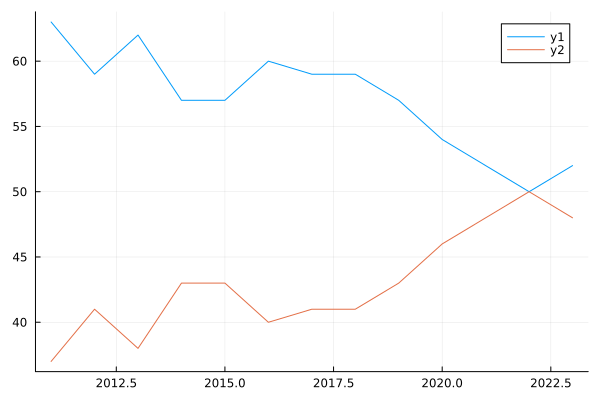

In [8]:
plot(life.year, [life.own,life.dont_own])

## Bar (Comparison)

In [9]:
agg = combine(groupby(auto, :Region), :Y2023=> mean)
agg

Row,Region,Y2023_mean
,String15,Float64
1,Midwest,663.0
2,Northeast,758.667
3,West,659.077
4,South,696.75


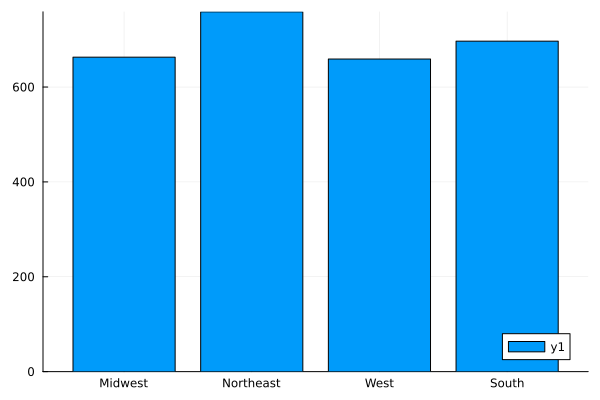

In [11]:
bar(agg.Region, agg.Y2023_mean)

## Pie (Proportion)

In [12]:
agg =combine(groupby(auto, :Region), :us_state=> length)
agg

Row,Region,us_state_length
,String15,Int64
1,Midwest,12
2,Northeast,9
3,West,13
4,South,16


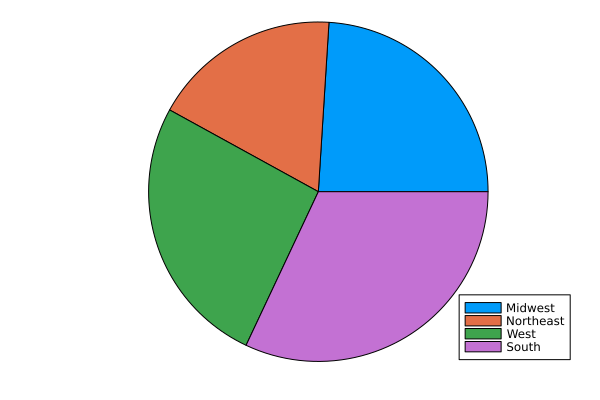

In [13]:
pie(agg.Region, agg.us_state_length)